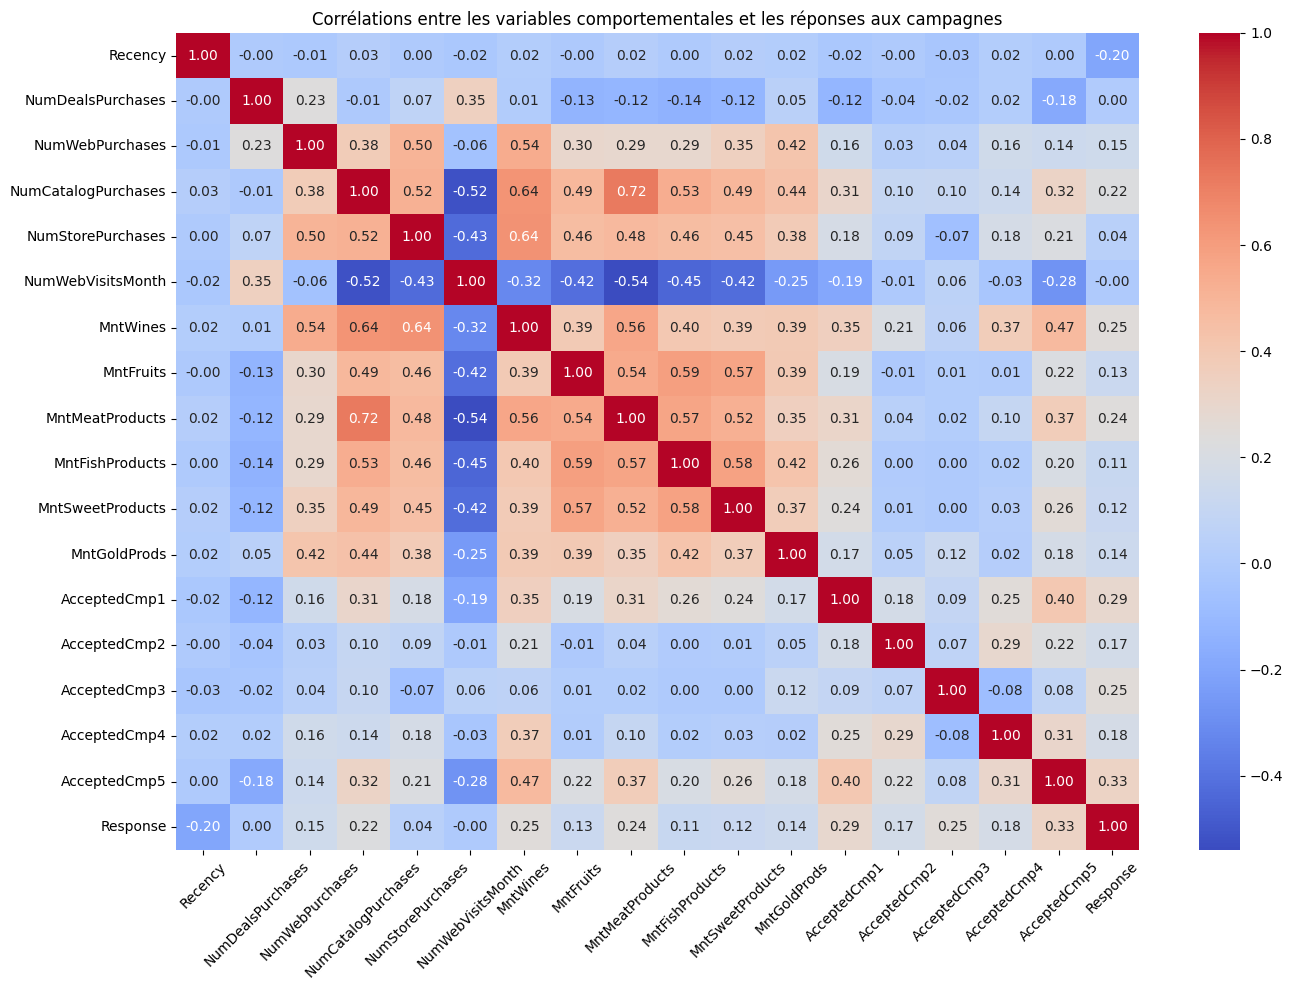

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv("Camp_Market_nettoye.csv", sep=';')

# Nettoyage des données : suppression des colonnes non pertinentes
df.drop(columns=["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue"], inplace=True)

# Remplacer les valeurs manquantes par la médiane pour les colonnes numériques
df.fillna(df.median(numeric_only=True), inplace=True)

# Identifier les variables comportementales
variables_comportementales = [
    "Recency", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth", "MntWines", "MntFruits",
    "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

# Ajouter les réponses aux campagnes marketing
reponses_campagnes = [
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
    "AcceptedCmp5", "Response"
]

# Créer un sous-ensemble du dataframe avec les variables comportementales et les réponses
df_comportement = df[variables_comportementales + reponses_campagnes]

# Standardiser les données pour l'analyse de corrélation
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_comportement), columns=df_comportement.columns)

# Calculer la matrice de corrélation
correlation_matrix = df_scaled.corr()

# Afficher la matrice de corrélation dans le notebook
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Corrélations entre les variables comportementales et les réponses aux campagnes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()